In [1]:
%run 2.1_data_preparation.ipynb

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kasim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Title              object
Tag                object
Date       datetime64[ns]
Content            object
dtype: object


In [2]:
# Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import nltk
import re

In [3]:
print("Spalten:", df_news.columns.tolist())
print("Anzahl der Einträge:", len(df_news))
df_news.head()

Spalten: ['Title', 'Tag', 'Date', 'Content', 'Cleaned Content', 'Label', 'Simple Label']
Anzahl der Einträge: 13957


,Title,Tag,Date,Content,Cleaned Content,Label,Simple Label
0,US Budget Deficit Widens More than Expected in...,Government Budget Value,2023-07-14,US Budget Deficit Widens More than Expected in...,"[budget, deficit, widens, expected, june, unit...",6,neutral
1,Visa Hits 24-week High,stocks,2023-07-14,Visa Hits 24-week HighUnited States stocksVisa...,"[visa, hits, week, high, united, states, stock...",6,neutral
2,Amazon Hits 43-week High,stocks,2023-07-14,Amazon Hits 43-week HighUnited States stocksAm...,"[amazon, hits, week, high, united, states, sto...",6,neutral
3,10-Year Treasury Yield Falls for 4th Session,Government Bond 10Y,2023-07-14,10-Year Treasury Yield Falls for 4th SessionUn...,"[year, treasury, yield, falls, session, united...",6,neutral
4,DXY Approaches 100,Currency,2023-07-14,DXY Approaches 100United States CurrencyThe do...,"[dxy, approaches, united, states, currency, do...",6,neutral


count    13957.000000
mean       524.710540
std        282.620804
min         90.000000
25%        219.000000
50%        507.000000
75%        752.000000
max       1117.000000
Name: text_length, dtype: float64


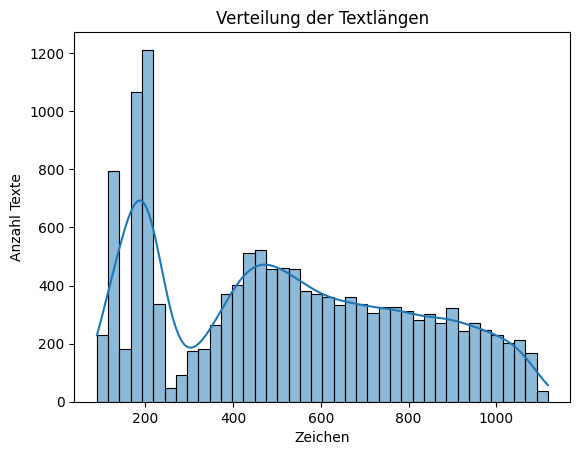

In [4]:
# Datum konvertieren
# df['date'] = pd.to_datetime(df['date']) # This column does not exist in the dataframe

# Textlänge berechnen
df_news['text_length'] = df_news['Content'].astype(str).apply(len) # Use 'Content' column

# Statistiken
print(df_news['text_length'].describe())

# Histogramm
sns.histplot(df_news['text_length'], bins=40, kde=True)
plt.title("Verteilung der Textlängen")
plt.xlabel("Zeichen")
plt.ylabel("Anzahl Texte")
plt.show()

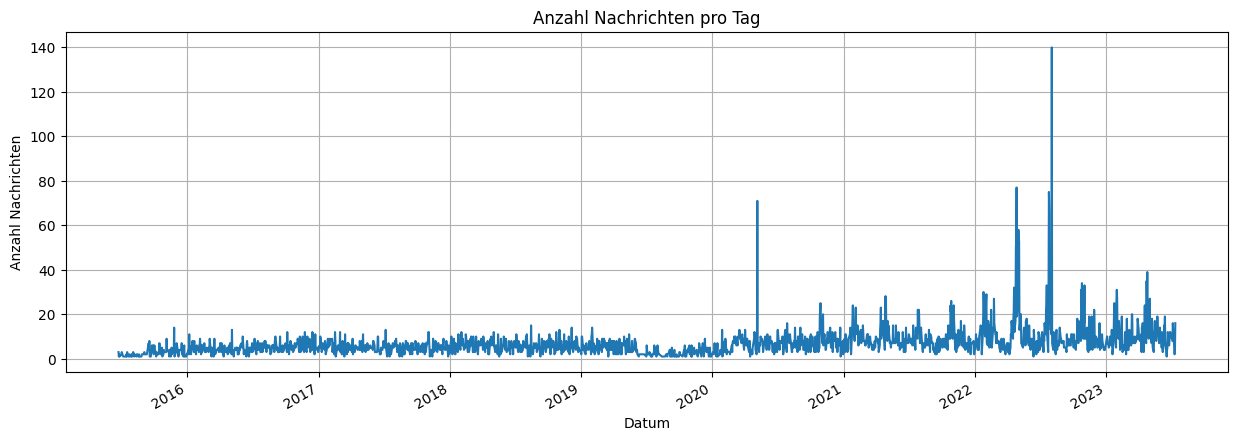

In [5]:
# Group by time and count the number of entries
daily_counts = df_news.groupby('Date').size()

# Plot the daily counts
daily_counts.plot(figsize=(15,5), title="Anzahl Nachrichten pro Tag")
plt.xlabel("Datum")
plt.ylabel("Anzahl Nachrichten")
plt.grid(True)
plt.show()

In [6]:
# Alle Wörter extrahieren
all_words = []
df_news['Cleaned Content'].dropna().apply(lambda t: all_words.extend(t))
word_freq = Counter(all_words)
print("Top 20 häufigste Wörter:")
print(word_freq.most_common(20))

Top 20 häufigste Wörter:
[('states', 16707), ('united', 16528), ('percent', 13810), ('usd', 10437), ('market', 10046), ('earnings', 9401), ('expectations', 8645), ('month', 6684), ('week', 6618), ('year', 6429), ('points', 5882), ('stock', 4866), ('since', 4547), ('index', 4427), ('stocks', 4226), ('rate', 4226), ('fed', 4203), ('billion', 3996), ('high', 3822), ('compared', 3805)]


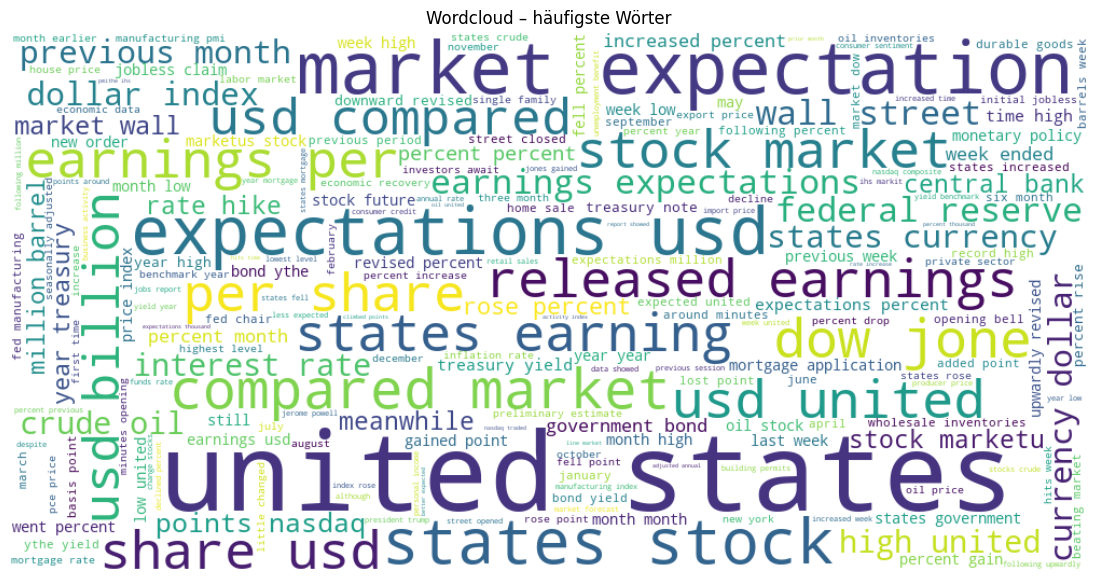

In [7]:
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(" ".join(all_words))
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud – häufigste Wörter")
plt.show()


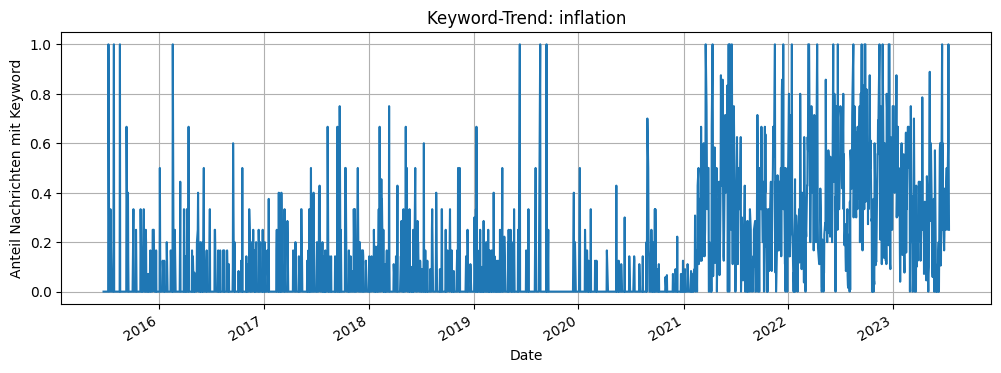

In [8]:
def keyword_trend(keyword):
    df_news['has_keyword'] = df_news['Content'].str.lower().str.contains(fr'\b{keyword}\b', na=False)
    trend = df_news.groupby('Date')['has_keyword'].mean()
    trend.plot(figsize=(12,4), title=f"Keyword-Trend: {keyword}")
    plt.ylabel("Anteil Nachrichten mit Keyword")
    plt.grid(True)
    plt.show()

# Beispiel: Keyword-Analyse für „inflation“
keyword_trend("inflation")